In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data handling
import pandas as pd
import numpy as np


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt


# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from joblib import dump


# Evaluation Metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


from sklearn.metrics import classification_report#, accuracy

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Other packages
import os

import warnings
warnings.filterwarnings('ignore')

## **TASK**
1. **Conduct Exploratory Data Analysis (EDA)**:
 Identify patterns, correlations, and any necessary data preprocessing steps, such as handling missing values, outliers, and data normalization.


2. **Feature Engineering**:
Evaluate which features might be most relevant to predicting client subscription and consider creating new features if applicable.

3. **Build a Predictive Model**:
Use a machine learning algorithm of choice to build a model predicting the subscription outcome.

4. **Evaluate Model Performance**:
Use appropriate metrics such as accuracy, precision, recall, and F1 score to assess model effectiveness. Consider any imbalanced classes and adjust accordingly, possibly using techniques like oversampling, undersampling, or adjusting the class weights.

5. **Explain the Findings and Insights**:  
Summarize key findings from the EDA and insights from the model, such as which features were most impactful, common characteristics of clients likely to subscribe, and actionable recommendations for the marketing team.

### **Exploratory Data Analysis (EDA)**

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/TMP Assignment/data/bank-additional-full.csv', delimiter=';')
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df1.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [7]:
df2 = pd.read_csv('/content/drive/MyDrive/TMP Assignment/data/bank-additional.csv', delimiter=';')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [9]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df2.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
df3 = pd.read_csv('/content/drive/MyDrive/TMP Assignment/data/bank-full.csv', delimiter=';')
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
df3.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df3.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [15]:
df4 = pd.read_csv('/content/drive/MyDrive/TMP Assignment/data/bank.csv', delimiter=';')
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [17]:
df4.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [18]:
df4.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#### **Insights from all four datasets**
The four datasets provided appear to have similar structures but vary in the number of rows and, in some cases, the number of columns.
---

##### **1. Compare the Datasets**
The key differences:
- **`df1`** and **`df2`**: 21 columns each (contain additional economic indicators like `emp.var.rate`, `cons.price.idx`, etc.).
- **`df3`** and **`df4`**: 17 columns each (missing the 5 additional columns in `df1` and `df2`).
- **Row Counts**:
    - `df1` has **41,188 rows** (largest dataset).
    - `df2` has **4,119 rows** (smallest dataset but includes extra economic variables).
    - `df3` has **45,211 rows** (the largest after `df1` but fewer columns).
    - `df4` has **4,521 rows** (small but includes fewer columns).

**Insight**:
- Datasets like `df1` and `df2` provide more features, which could improve model performance.
- `df3` and `df4` could be combined with `df1` and `df2` after feature alignment.

---


##### **Align the Features Across Datasets**

In [19]:
# Add missing columns with NaN to df3 and df4
missing_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in missing_columns:
    df3[col] = np.nan
    df4[col] = np.nan

# Reorder columns to match df1 and df2
column_order = df1.columns
# Only select columns that are in both column_order and df3.columns
common_columns = [col for col in column_order if col in df3.columns]
df3 = df3[common_columns]
df4 = df4[common_columns]

In [20]:
# Confirm alignment
# Confirm if the columns in df3 are a subset of the columns in df1
all(column in df1.columns for column in df3.columns)

True

In [21]:
# Confirm alignment
# Confirm if the columns in df3 are a subset of the columns in df1
all(column in df1.columns for column in df4.columns)

True

##### **Combine the Datasets**

In [22]:
# Combine all datasets
combine_df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

# Verify combined dataset
print(combine_df.info())
print(combine_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95039 entries, 0 to 95038
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             95039 non-null  int64  
 1   job             95039 non-null  object 
 2   marital         95039 non-null  object 
 3   education       95039 non-null  object 
 4   default         95039 non-null  object 
 5   housing         95039 non-null  object 
 6   loan            95039 non-null  object 
 7   contact         95039 non-null  object 
 8   month           95039 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        95039 non-null  int64  
 11  campaign        95039 non-null  int64  
 12  pdays           95039 non-null  int64  
 13  previous        95039 non-null  int64  
 14  poutcome        95039 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

##### **Handle Missing Values**

In [23]:
# Impute missing values for numeric columns with median
for col in ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    combine_df[col] = combine_df[col].fillna(combine_df[col].median())

# Impute missing values for 'day_of_week' with mode (most frequent value)
combine_df['day_of_week'] = combine_df['day_of_week'].fillna(combine_df['day_of_week'].mode()[0])

# Check again
print(combine_df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [24]:
# Iterate through each column and print unique elements
for column in combine_df.columns:
    unique_values = combine_df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: age
Unique Values (80): [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89 90 93]

Column: job
Unique Values (12): ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column: marital
Unique Values (4): ['married' 'single' 'divorced' 'unknown']

Column: education
Unique Values (11): ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate' 'tertiary' 'secondary'
 'primary']

Column: default
Unique Values (3): ['no' 'unknown' 'yes']

Column: housing
Unique Values (3): ['no' 'yes' 'unknown']

Column: loan
Unique Values (3): ['no' 'yes' 'unknown']

Column: contact
Unique Values (3): ['telephone' 'cellular' 'unknown']

Column: month
Unique Values 

In [25]:
#combine_df['job'].replace("Automotive", "Automobile", inplace = True)
#combine_df['marital'].replace("Automotive", "Automobile", inplace = True)
#combine_df['Sector'].replace("Automotive", "Automobile", inplace = True)
#combine_df['Sector'].replace("Automotive", "Automobile", inplace = True)
#combine_df['Sector'].replace("Automotive", "Automobile", inplace = True)

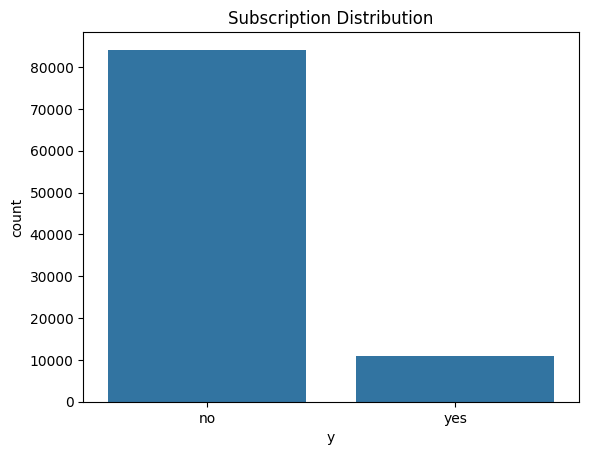

In [26]:
# Check target variable distribution
sns.countplot(x='y', data=combine_df)
plt.title('Subscription Distribution')
plt.show()

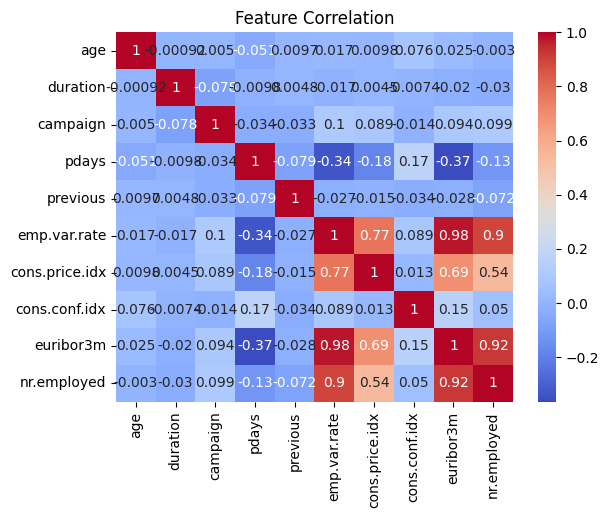

In [27]:
# Correlation heatmap for numeric features
numeric_features = combine_df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(combine_df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### **Feature Engineering**

##### **Dealing with Imbalance Target Variable**

In [28]:
# Convert df_encoded back to a Pandas DataFrame
# df_encoded = pd.DataFrame(df_encoded)

# Now you can use the drop method
X = combine_df.drop(columns=['y'])

# Convert 'no' to 0 and 'yes' to 1
combine_df['y'] = combine_df['y'].map({'no': 0, 'yes': 1})

y = combine_df['y']

print("Original dataset shape:", Counter(y))

Original dataset shape: Counter({0: 84138, 1: 10901})


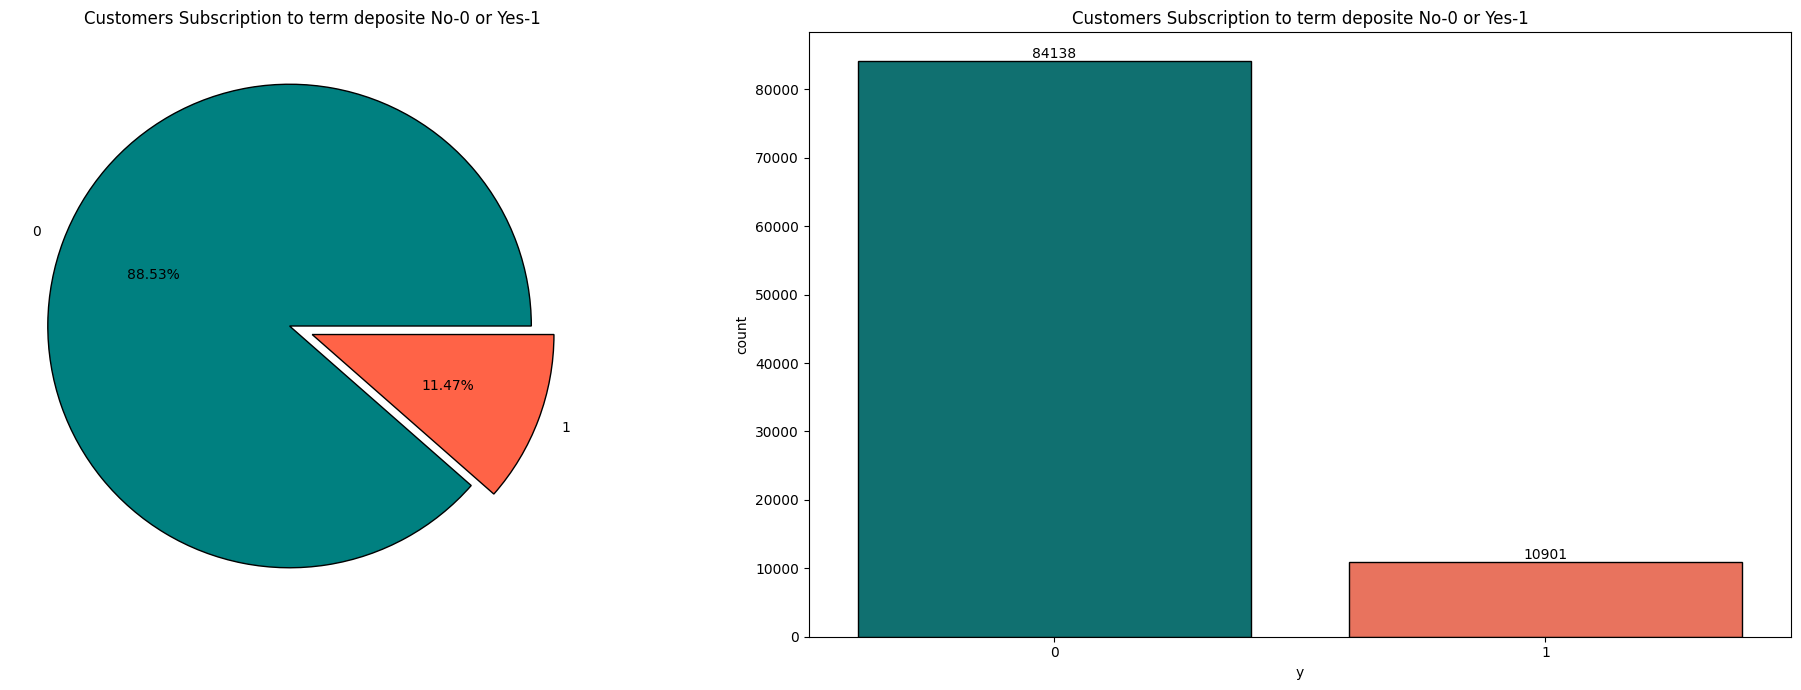

In [29]:
# Define colors for the plots
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

# Calculate the percentage of positive and negative values
y_distribute = combine_df['y'].value_counts()
plot_pie = [y_distribute[0] / y_distribute.sum() * 100, y_distribute[1] / y_distribute.sum() * 100]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(plot_pie, labels=['0', '1'], autopct='%1.2f%%', explode=(0.1, 0),
            colors=palette[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Customers Subscription to term deposite No-0 or Yes-1')

# Plot the countplot on the second subplot
sns.countplot(data=combine_df, x='y', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['0', '1'])
axes[1].set_title('Customers Subscription to term deposite No-0 or Yes-1')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [30]:
# Separate numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64'])
categorical_columns = X.select_dtypes(include=['object'])

# Print the resulting DataFrames
print("Numeric Columns:")
print(numeric_columns.head())

print("\nCategorical Columns:")
print(categorical_columns.head())

Numeric Columns:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0  

Categorical Columns:
         job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   servi

In [31]:
# Iterate through each column and print unique elements
for column in categorical_columns.columns:
    unique_values = categorical_columns[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: job
Unique Values (12): ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column: marital
Unique Values (4): ['married' 'single' 'divorced' 'unknown']

Column: education
Unique Values (11): ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate' 'tertiary' 'secondary'
 'primary']

Column: default
Unique Values (3): ['no' 'unknown' 'yes']

Column: housing
Unique Values (3): ['no' 'yes' 'unknown']

Column: loan
Unique Values (3): ['no' 'yes' 'unknown']

Column: contact
Unique Values (3): ['telephone' 'cellular' 'unknown']

Column: month
Unique Values (12): ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep' 'jan' 'feb']

Column: day_of_week
Unique Values (5): ['mon' 'tue' 'wed' 'thu' 'fri']

Column: poutcome
Unique Values (5): ['nonexistent' 'failure' 'success' 'unknown' 'other']



In [32]:
# Replace 'unknown' with the mode of each column
for col in categorical_columns:
    mode_value = X[col].mode()[0]  # Calculate the mode
    X[col] = X[col].replace('unknown', mode_value)

# Verify the changes
for col in categorical_columns:
    print(f"Unique values in column '{col}': {X[col].unique()}")

Unique values in column 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'secondary' 'university.degree' 'illiterate' 'tertiary' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['no' 'yes']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['telephone' 'cellular']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep' 'jan' 'feb']
Unique values in column 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in column 'poutcome': ['nonexistent' 'failure' 'success' 'unknown' 'other']


In [33]:
# Define numerical and categorical features
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
label_encode_columns = ['default', 'housing', 'contact', 'loan']
one_hot_encode_columns = ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']

# Preprocessing for numerical features
numerical_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Apply Label Encoding for specified columns
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Preprocessing for categorical features
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# Label encode the required columns
combine_df = label_encode(X, label_encode_columns)

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_columns),
        ('cat_onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), one_hot_encode_columns)
    ],
    remainder='passthrough'  # Keep other columns if necessary
)

# Apply the preprocessing pipeline to the dataset
df_encoded = preprocessor.fit_transform(X)

# Get feature names after transformation
encoded_feature_names = numeric_columns + list(preprocessor.named_transformers_['cat_onehot'].get_feature_names_out(one_hot_encode_columns)) + label_encode_columns

# Convert the resulting array back to a DataFrame with appropriate column names
df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names)

# Display the first few rows of the fully encoded DataFrame
print(df_encoded.head())
X = df_encoded


        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.470642  0.009942 -0.568054  1.073169 -0.229326      0.405222   
1  1.565623 -0.423703 -0.568054  1.073169 -0.229326      0.405222   
2 -0.333987 -0.125572 -0.568054  1.073169 -0.229326      0.405222   
3 -0.049046 -0.415959 -0.568054  1.073169 -0.229326      0.405222   
4  1.470642  0.188047 -0.568054  1.073169 -0.229326      0.405222   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
0        0.800799       1.467358   0.437279     0.222754  ...   
1        0.800799       1.467358   0.437279     0.222754  ...   
2        0.800799       1.467358   0.437279     0.222754  ...   
3        0.800799       1.467358   0.437279     0.222754  ...   
4        0.800799       1.467358   0.437279     0.222754  ...   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_other  \
0              0.0              0.0                   1.0             0.0   
1              0.0              0.0     

In [34]:
# Combining SMOTE and ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X, y)
print("After SMOTE+ENN:", Counter(y_resampled_smoteenn))
X = X_resampled_smoteenn
y = y_resampled_smoteenn

After SMOTE+ENN: Counter({1: 81431, 0: 70133})


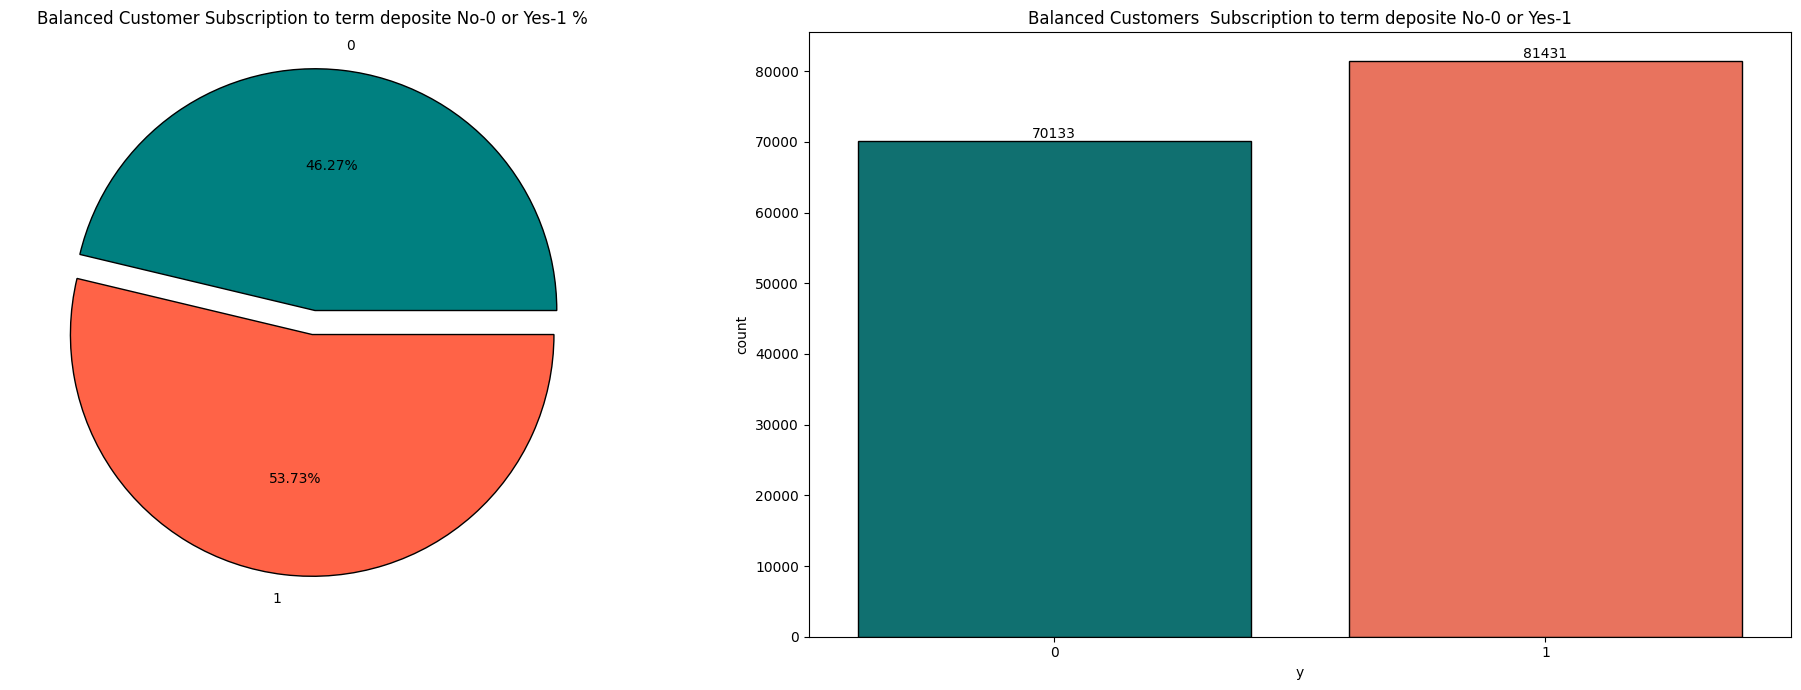

In [35]:
# Create a new DataFrame with balanced data
df_balanced = pd.concat([X_resampled_smoteenn, y_resampled_smoteenn], axis=1)

# Calculate the percentage of positive and negative values in the balanced dataset
y_distribute_balanced = df_balanced['y'].value_counts()
plot_pie_balanced = [
    y_distribute_balanced[0] / y_distribute_balanced.sum() * 100,
    y_distribute_balanced[1] / y_distribute_balanced.sum() * 100
]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(
    plot_pie_balanced,
    labels=['0', '1'],
    autopct='%1.2f%%',
    explode=(0.1, 0),
    colors=palette[:2],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
axes[0].set_title('Balanced Customer Subscription to term deposite No-0 or Yes-1 %')

# Plot the countplot on the second subplot
sns.countplot(data=df_balanced, x='y', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['0', '1'])
axes[1].set_title('Balanced Customers  Subscription to term deposite No-0 or Yes-1')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### **Build a Predictive Model**

##### **Custom Function**

In [36]:
 # Confusion Matrix Function
def plot_metric(confusion, name):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='viridis')
    ax.set_title(f'{name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [37]:
# Function for Training Models

def train_ml_model(X_train, y_train, X_eval, y_eval, model_class, **model_params):
    """
    Train a machine learning model, calculate various metrics, generate an ROC curve,
    and return results in a DataFrame.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_eval: Evaluation features
    - y_eval: Evaluation labels
    - model_class: Class of the machine learning model to be used (e.g., LogisticRegression)
    - **model_params: Additional parameters for the model constructor

    Returns:
    - result_df: DataFrame containing model, predictions, F1-score, FPR, TPR, thresholds, and AUC-score
    """

    results = []  # List to store results for each model

    # Initialize the model
    model = model_class(**model_params)
    model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    predictions = model.predict(X_eval)

    # Calculate F1 score
    f1 = round(f1_score(y_eval, predictions), 2)

    # Make predictions on the training and evaluation sets
    train_preds = model.predict(X_train)
    eval_preds = model.predict(X_eval)

    # Calculate F1-score for training and evaluation sets
    train_f1 = f1_score(y_train, train_preds)
    eval_f1 = f1_score(y_eval, eval_preds)

    # Determine if the model is overfitting, underfitting, or balanced
    if train_f1 > eval_f1:
        assessment = "Overfitting"
    elif train_f1 < eval_f1:
        assessment = "Underfitting"
    else:
        assessment = "Balanced"

    # Calculate and Plot confusion matrix
    confusion = confusion_matrix(y_eval, predictions)
    plot_metric(confusion, model_class())

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, predictions)

    # Calculate AUC score
    auc = round(roc_auc_score(y_eval, predictions), 2)

    # Create ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Create a DataFrame to store the results
    result_data = {
        'Model': model_class.__name__,  # Using the model class name as the identifier,
        #'Predictions': [predictions],
        'F1-Score': f1,
        #'FPR': [fpr],
        #'TPR': [tpr],
        #'Thresholds': [thresholds],
        'AUC-Score': auc,
        'Assessment': assessment
    }

    results.append(result_data)

    result_df = pd.DataFrame(results)

    return result_df

##### **Data Spliting**

In [38]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split( X, y, random_state=46)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=42)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 85254
 size of validation set: 28419
 size of test set: 37891



##### **Model 1**

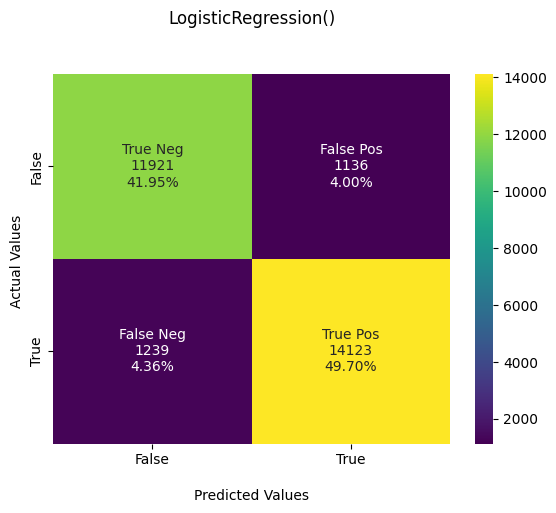

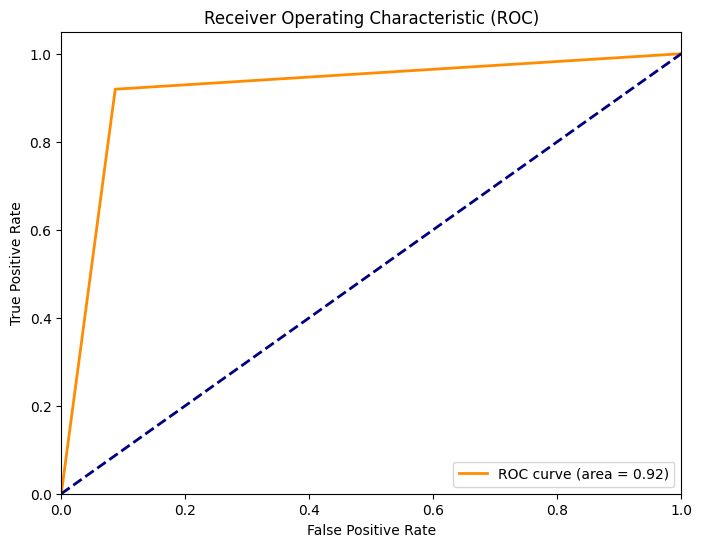

,Model,F1-Score,AUC-Score,Assessment
0,LogisticRegression,0.92,0.92,Underfitting


In [39]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid, LogisticRegression, random_state=42)
lr = result_df
lr

##### **Model 2**

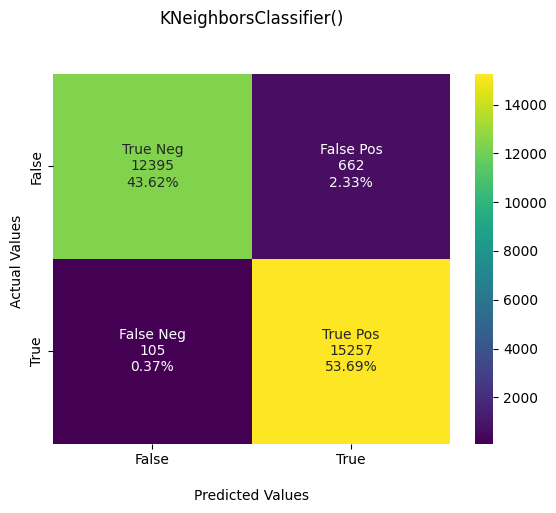

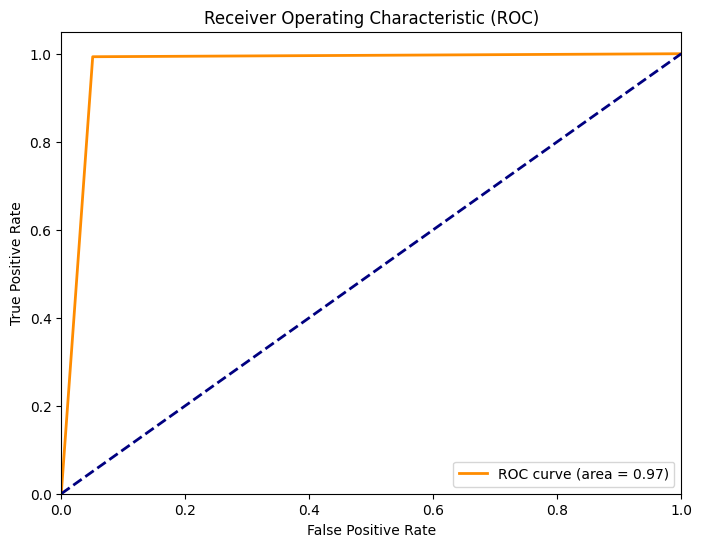

,Model,F1-Score,AUC-Score,Assessment
0,KNeighborsClassifier,0.98,0.97,Overfitting


In [40]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid, KNeighborsClassifier)
knn = result_df
knn

##### **Model 3**

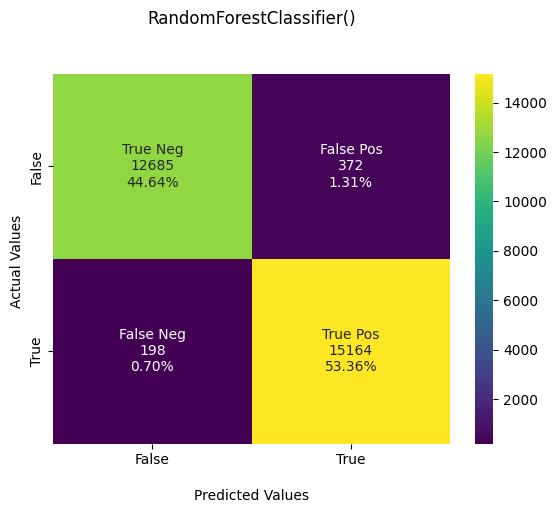

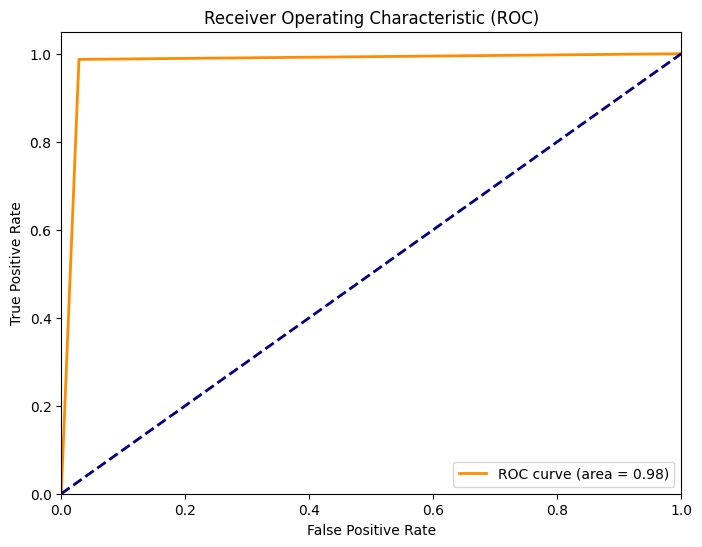

,Model,F1-Score,AUC-Score,Assessment
0,RandomForestClassifier,0.98,0.98,Overfitting


In [41]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid, RandomForestClassifier, random_state=42)
rf = result_df
rf

##### **Model 4**

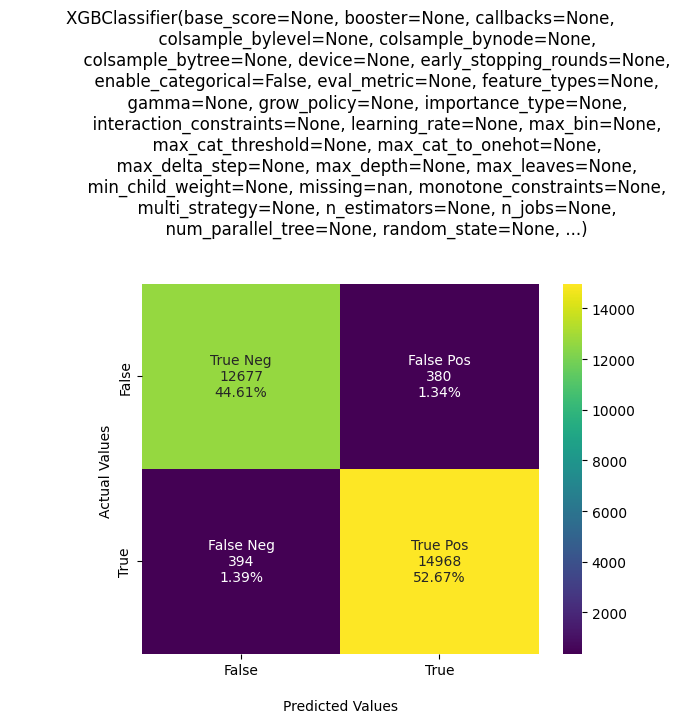

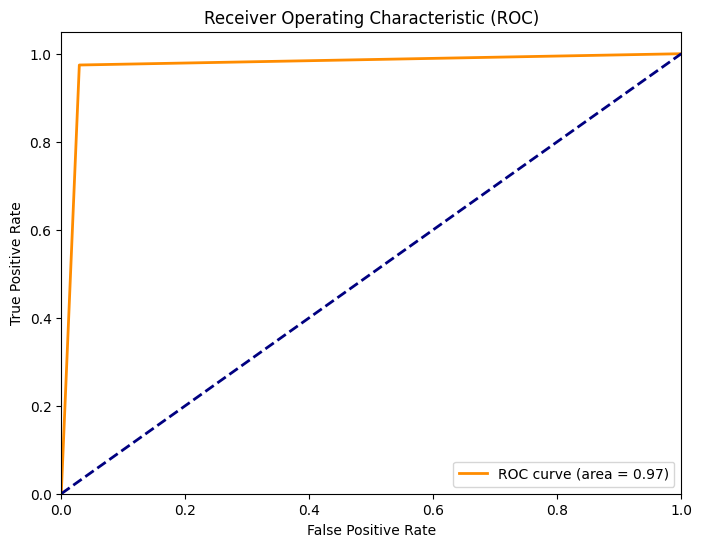

,Model,F1-Score,AUC-Score,Assessment
0,XGBClassifier,0.97,0.97,Overfitting


In [42]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid,  XGBClassifier, random_state=42)
xgb = result_df
xgb


##### **Model 5**

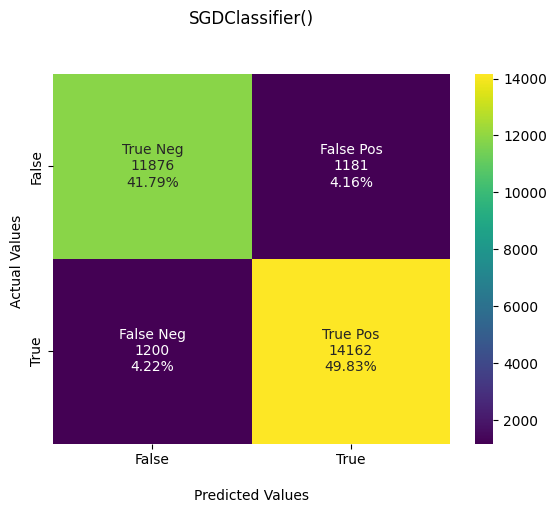

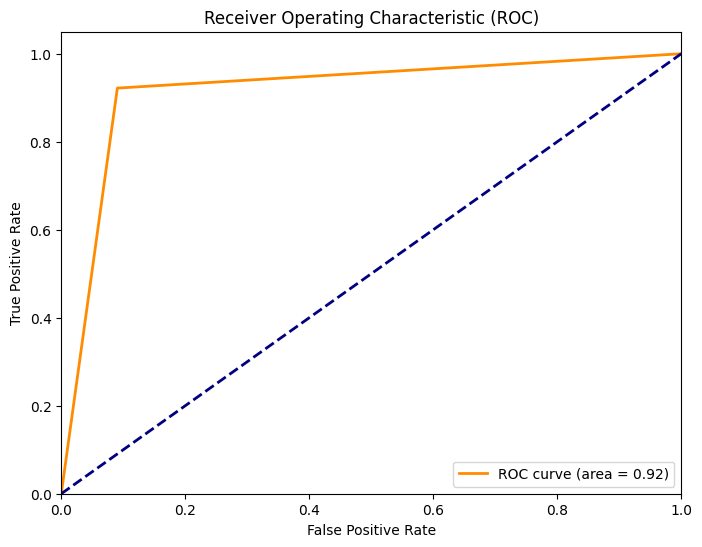

,Model,F1-Score,AUC-Score,Assessment
0,SGDClassifier,0.92,0.92,Underfitting


In [43]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid, SGDClassifier, random_state=42)
sgd = result_df
sgd

##### **Model 6**

In [ ]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid, GradientBoostingClassifier, random_state=42)
gb = result_df
gb

##### **Model 7**

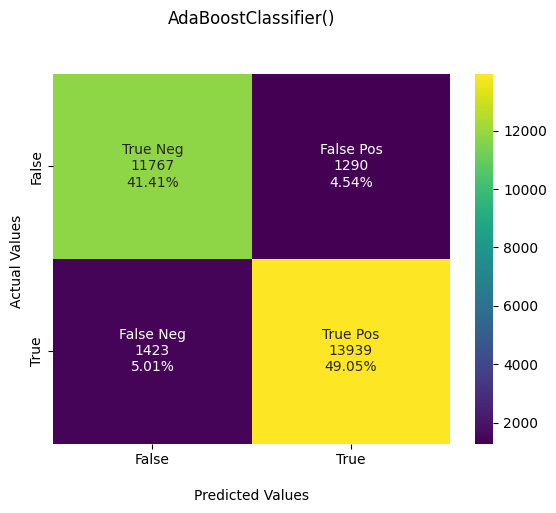

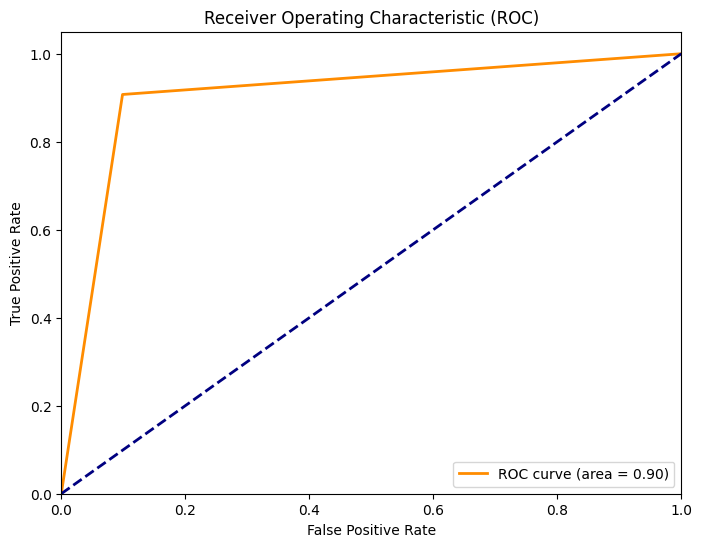

,Model,F1-Score,AUC-Score,Assessment
0,AdaBoostClassifier,0.91,0.9,Overfitting


In [ ]:
result_df = train_ml_model(X_train, y_train, X_valid, y_valid, AdaBoostClassifier, random_state=42)
adb = result_df
adb

### **Evaluate Model Performance**

In [ ]:
results = {'model': ['XGBClassifier', 'Random Forest', 'KNeighborsClassifier',  'Logistic Regression', 'SGD Classifier', 'GradientBoosting', 'AdaBoost'],
           'f1_score': [xgb['F1-Score'].iloc[0], rf['F1-Score'].iloc[0], lr['F1-Score'].iloc[0], knn['F1-Score'].iloc[0], sgd['F1-Score'].iloc[0], gb['F1-Score'].iloc[0], adb['F1-Score'].iloc[0]],
           'AUC_score': [xgb['AUC-Score'].iloc[0], rf['AUC-Score'].iloc[0], lr['AUC-Score'].iloc[0], knn['AUC-Score'].iloc[0], sgd['AUC-Score'].iloc[0], gb['AUC-Score'].iloc[0], adb['AUC-Score'].iloc[0]],
           'Assessment': [xgb['Assessment'].iloc[0], rf['Assessment'].iloc[0], lr['Assessment'].iloc[0], knn['Assessment'].iloc[0], sgd['Assessment'].iloc[0], gb['Assessment'].iloc[0], adb['Assessment'].iloc[0]]
           }

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='AUC_score', ascending=False)
results_df

,model,f1_score,AUC_score,Assessment
1,Random Forest,0.98,0.98,Overfitting
0,XGBClassifier,0.97,0.97,Overfitting
3,Logistic Regression,0.98,0.97,Overfitting
5,GradientBoosting,0.95,0.94,Overfitting
2,KNeighborsClassifier,0.92,0.92,Underfitting
4,SGD Classifier,0.92,0.92,Underfitting
6,AdaBoost,0.91,0.90,Overfitting


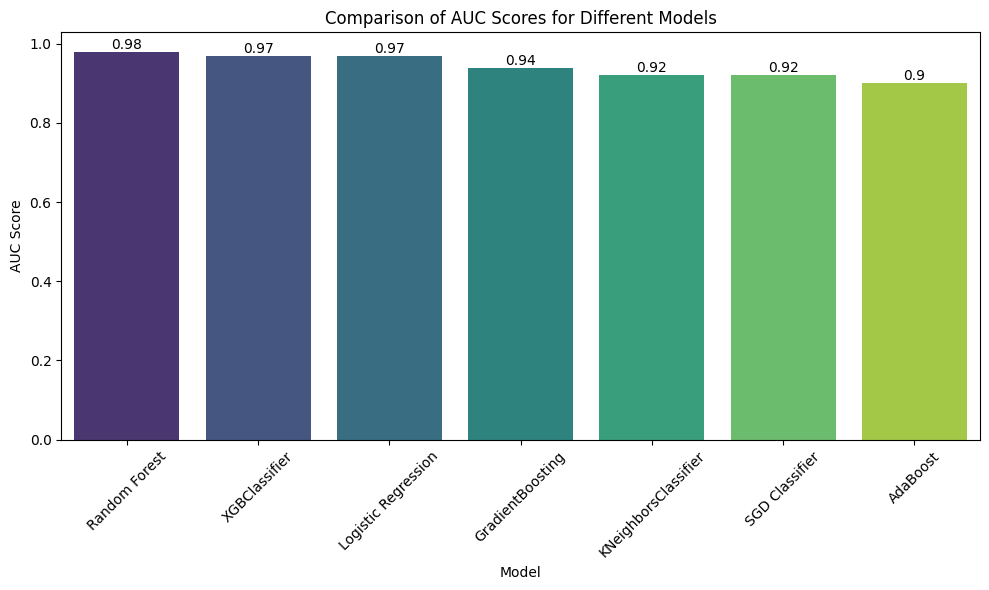

In [ ]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='model', y='AUC_score', palette='viridis')

# Add data labels
for i, value in enumerate(results_df['AUC_score']):
    plt.text(i, value, round(value, 2), ha='center', va='bottom')

# Set other plot properties
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')
plt.tight_layout()
plt.show()

##### **Hyperparameter Tuning and Feature Importances**

In [ ]:
# Create Histogram Gradient Boosting model
model = RandomForestClassifier(random_state=42)
model.fit(X_valid, y_valid)


# Define the parameter grid for GridSearchCV
param_distribution = {
    'max_features': ['sqrt', 'log2', 'auto'],
    'n_estimators': [100, 200, 300],
    'max_depth' : [100, 50, 10]
}

# Create a repeated stratified K-fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create GridSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions = param_distribution, n_jobs=-1, cv=cv, scoring='f1', error_score=0)
random_result = random_search.fit(X_test, y_test)

# Summarize results
print("Best Score: %f using %s" % (random_result.best_score_, random_result.best_params_))

In [ ]:
best_model = RandomForestClassifier( n_estimators = 300, max_features ='log2', max_depth= 50, random_state=42)
best_model.fit(X_test, y_test)

##### **Saving Model and Preprocessor**

In [ ]:
# Set the destination path to the "export" directory
destination = "."

# Create a dictionary to store the objects and their filenames
models = {
    "preprocessor": preprocessor,
    "Best_model": best_model
}

# Loop through the models and save them using joblib.dump()
for name, model in models.items():
    dump(model, os.path.join(destination, f"{name}.joblib"))

print("Models saved successfully!")

In [ ]:
!pip freeze > requirements.txt

### **Explain the Findings and Insights**